# Value at Risk (VaR)

## Definition

Value at Risk (VaR) provides an estimate of a loss from a portfolio that would lead to a minimal market impact if a portfolio were to be liquidated under a given degree of confidenc over a given time period.

## Import Libraries

In [55]:
import numpy as np
from scipy.stats import norm
import seaborn as sns 
import pandas as pd
from pandas_datareader import data as web
import matplotlib as mpl
import matplotlib.pyplot as plt
from tabulate import tabulate
mpl.rcParams['font.family'] = 'serif'
sys.path.append('05_com')

## Variance-Covariance approach

Variance-Covariance calculation of daily Value-at-Risk using confidence level, with mean of returns and standard deviation of returns, on a portfolio of value.

In [94]:
def read_data(data, source, start, end):
    # Imports data from online sources.
    df = web.DataReader(name=data, data_source=source, start=start, end=end)
    # Calculate the daily returns
    df['returns']= df.Close.pct_change()
    
    # Determine the mean and standard deviation of the daily returns.
    mean = np.mean(df['returns'])
    sigma = np.std(df['returns'])

    # Plot the normal curve against the daily returns
    df['returns'].hist(bins=40, normed=True, alpha=0.5)
    x = np.linspace(mean - 3*sigma, mean + 3*sigma, 100)
    plt.plot(x, mlab.normpdf(x, mean, sigma), "r")
    return plt.show()

data: ^GDAXI
source: yahoo
start: 01-01-2008
end: 31-12-2017


D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if __name__ == '__main__':


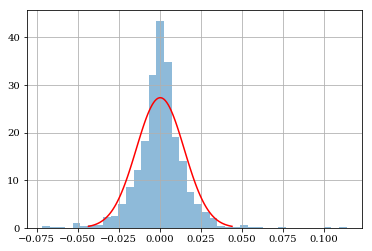

In [81]:
# input the details of online source:
data = (raw_input("data: ")) 
source = (raw_input("source: ")) 
start = (raw_input("start: ")) 
end = (raw_input("end: ")) 

read_data(data, source, start, end)

In [92]:
def var_cov_var(P, c1=0.90, c2=0.95, c3=0.99):
    # Calculate the VaR using point percentile function
    VaR_90 = norm.ppf(1-c1 ,mean, sigma)
    VaR_95 = norm.ppf(1-c2, mean, sigma)
    VaR_99 = norm.ppf(1-c3, mean, sigma)
    
    # Calculate the Value at Risk based on portfolio value (P)
    VaR_90P = P-P*(VaR_90 + 1)
    VaR_95P = P-P*(VaR_95 + 1)
    VaR_99P = P-P*(VaR_99 + 1)
    
    # print table
    print "------------\n"
    print
    print tabulate([['90%', VaR_90, VaR_90P], ['95%', VaR_95, VaR_95P], ['99%', VaR_99, VaR_99P]], headers=['Confidence Level', ' VaR (percentile)', ' Value at Risk'])

In [93]:
# call the function:
P = (input("P: ")) 
var_cov_var(P)

P: 1000000
------------

Confidence Level       VaR (percentile)     Value at Risk
------------------  -------------------  ----------------
90%                          -0.0184078           18407.8
95%                          -0.0237106           23710.6
99%                          -0.0336577           33657.7


## Historical Simulation approach

Historic simulation method takes previously observed events and builds them into a model that predicts the maximum likely loss over the next time period.

In [97]:
def read_data(data, source, start, end):
    # Imports data from online sources.
    df = web.DataReader(name=data, data_source=source, start=start, end=end)
    
    # Calculate the daily returns
    df['returns']= df.Close.pct_change()
    df = df.dropna()
    
    # Plot the normal curve against the daily returns
    ax = sns.distplot(df['returns'], kde=True, color='blue', bins=40)
    ax.set(xlabel='Returns', ylabel='Fequency')
    return ax

data: ^GDAXI
source: yahoo
start: 01-01-2008
end: 31-12-2017


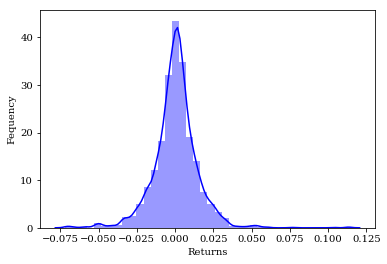

In [98]:
# input the details of online source
data = (raw_input("data: ")) 
source = (raw_input("source: ")) 
start = (raw_input("start: ")) 
end = (raw_input("end: ")) 

read_data(data, source, start, end)

In [100]:
def hist_var(P ,c1=0.10, c2=0.05, c3=0.01):
    # Sort the returns
    df.sort_values('returns', inplace=True, ascending=True)
    # Calculate the VaR using point percentile function
    VaR_90 = df['returns'].quantile(c1)
    VaR_95 = df['returns'].quantile(c2)
    VaR_99 = df['returns'].quantile(c3)
    
    # Calculate the Value at Risk based on portfolio value (P)
    VaR_90P = P-P*(VaR_90 + 1)
    VaR_95P = P-P*(VaR_95 + 1) 
    VaR_99P = P-P*(VaR_99 + 1)
    
    #print table
    print "------------\n"
    print tabulate([['90%', VaR_90, VaR_90P], ['95%', VaR_95, VaR_95P], ['99%', VaR_99, VaR_99P]], headers=['Confidence Level', ' VaR (percentile)', ' Value at Risk'])

In [101]:
# call the function:
P = (input("P: ")) 
hist_var(P)

P: 1000000
------------

Confidence Level       VaR (percentile)     Value at Risk
------------------  -------------------  ----------------
90%                          -0.0161286           16128.6
95%                          -0.0230154           23015.4
99%                          -0.0439564           43956.4


## Disadvantages

However, VaR is not without its disadvantages:

- VaR does not discuss the magnitude of the expected loss beyond the value of VaR, i.e. it will tell us that we are likely to see a loss exceeding a value, but not how much it exceeds it.


- It does not take into account extreme events, but only typical market conditions.


- Since it uses historical data (it is rearward-looking) it will not take into account future market regime shifts that can change volatilities and correlations of assets.

VaR should not be used in isolation. It should always be used with a suite of risk management techniques, such as diversification, optimal portfolio allocation and prudent use of leverage.